In [23]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Load Articles
articles = pd.read_csv('articles.csv')

In [25]:
# Load Customers
customers = pd.read_csv('customers.csv')

In [26]:
# Load Transactions
transactions = pd.read_csv('transactions_train.csv')

In [27]:
transaction_counts = transactions['customer_id'].value_counts()

# Define frequent buyers as those with more transactions than the 75th percentile
frequent_buyer_threshold = transaction_counts.quantile(0.80)
frequent_buyers = transaction_counts[transaction_counts > frequent_buyer_threshold].index

print(f"The threshold for frequent buyers is more than {frequent_buyer_threshold} transactions.")

The threshold for frequent buyers is more than 34.0 transactions.


In [28]:
# Add a column to count transactions per customer
transactions['transaction_count'] = transactions.groupby('customer_id')['customer_id'].transform('count')

# Label frequent buyers
transactions['frequent_buyer'] = transactions['transaction_count'] > transactions['transaction_count'].quantile(0.80)

# Count unique frequent buyers
num_frequent_buyers = transactions[transactions['frequent_buyer']]['customer_id'].nunique()
print(f"Number of frequent buyers: {num_frequent_buyers}")

Number of frequent buyers: 30448


In [29]:
# Identify frequent buyer IDs
frequent_buyer_ids = transactions[transactions['frequent_buyer']]['customer_id'].unique()

# Now filter the transactions to include only those that belong to frequent buyers
transactions_frequent = transactions[transactions['customer_id'].isin(frequent_buyer_ids)]

In [30]:
frequent_transactions = transactions_frequent.merge(articles[['article_id', 'product_group_name', 'product_type_name', 'colour_group_name']], on='article_id', how='left')


most_common_categories = frequent_transactions.groupby('customer_id')['product_group_name'].apply(lambda x: x.mode()[0])

most_common_product_types = frequent_transactions.groupby('customer_id')['product_type_name'].apply(lambda x: x.mode()[0])

most_common_colors = frequent_transactions.groupby('customer_id')['colour_group_name'].apply(lambda x: x.mode()[0])


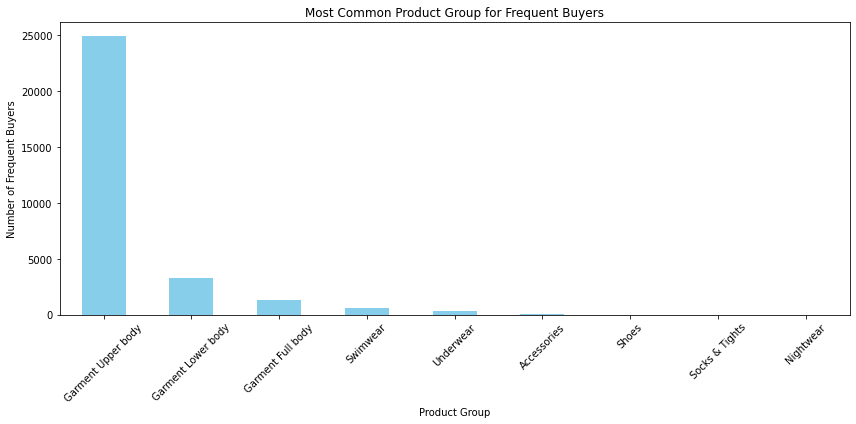

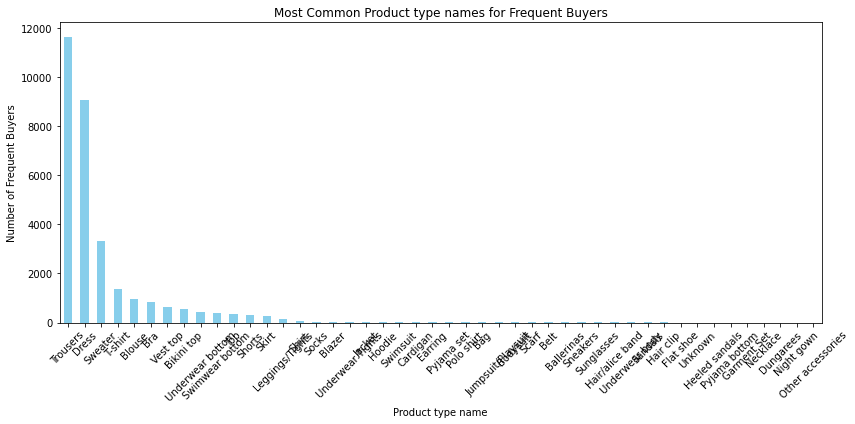

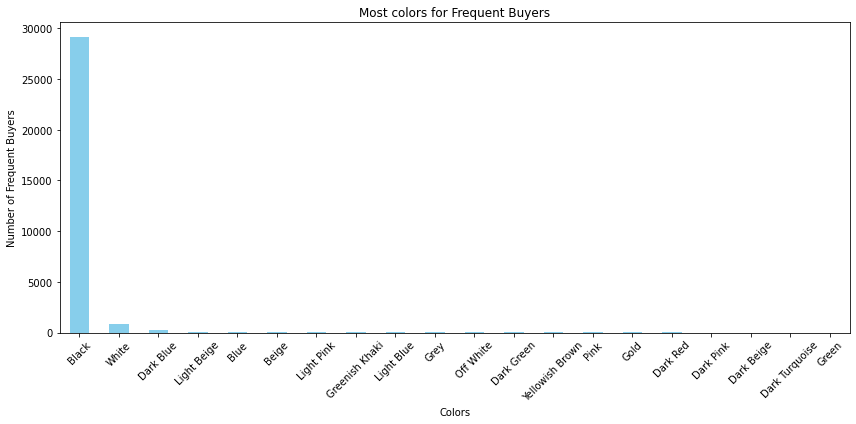

In [31]:
# Plot the distribution of the most common categories for frequent buyers
plt.figure(figsize=(12, 6))
most_common_categories.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Product Group for Frequent Buyers')
plt.xlabel('Product Group')
plt.ylabel('Number of Frequent Buyers')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the x-labels
plt.show()

# Plot the distribution of the most common categories for frequent buyers
plt.figure(figsize=(12, 6))
most_common_product_types.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Product type names for Frequent Buyers')
plt.xlabel('Product type name')
plt.ylabel('Number of Frequent Buyers')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the x-labels
plt.show()

# Plot the distribution of the most common categories for frequent buyers
plt.figure(figsize=(12, 6))
most_common_colors.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most colors for Frequent Buyers')
plt.xlabel('Colors')
plt.ylabel('Number of Frequent Buyers')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the x-labels
plt.show()


In [32]:
# Calculate the 4 least common product groups for each customer
least_common_categories = frequent_transactions.groupby('customer_id')['product_group_name'].apply(
    lambda x: x.value_counts().nsmallest(2).index.tolist())

# Calculate the 4 least common product types for each customer
least_common_product_types = frequent_transactions.groupby('customer_id')['product_type_name'].apply(
    lambda x: x.value_counts().nsmallest(2).index.tolist())

# Calculate the 4 least common colors for each customer
least_common_colors = frequent_transactions.groupby('customer_id')['colour_group_name'].apply(
    lambda x: x.value_counts().nsmallest(2).index.tolist())


'''# Get the counts for the least common attributes
least_common_categories_count = frequent_transactions.groupby('customer_id')['product_group_name'].apply(lambda x: x.value_counts().iloc[-1])
least_common_product_types_count = frequent_transactions.groupby('customer_id')['product_type_name'].apply(lambda x: x.value_counts().iloc[-1])
least_common_colors_count = frequent_transactions.groupby('customer_id')['colour_group_name'].apply(lambda x: x.value_counts().iloc[-1])

# Combine the least common attributes with their counts into one DataFrame
least_common_attributes_df = pd.DataFrame({
    'Least_Common_Category': least_common_categories,
    'Least_Common_Category_Count': least_common_categories_count,
    'Least_Common_Product_Type': least_common_product_types,
    'Least_Common_Product_Type_Count': least_common_product_types_count,
    'Least_Common_Color': least_common_colors,
    'Least_Common_Color_Count': least_common_colors_count,
}).reset_index()

print(least_common_colors)'''

"# Get the counts for the least common attributes\nleast_common_categories_count = frequent_transactions.groupby('customer_id')['product_group_name'].apply(lambda x: x.value_counts().iloc[-1])\nleast_common_product_types_count = frequent_transactions.groupby('customer_id')['product_type_name'].apply(lambda x: x.value_counts().iloc[-1])\nleast_common_colors_count = frequent_transactions.groupby('customer_id')['colour_group_name'].apply(lambda x: x.value_counts().iloc[-1])\n\n# Combine the least common attributes with their counts into one DataFrame\nleast_common_attributes_df = pd.DataFrame({\n    'Least_Common_Category': least_common_categories,\n    'Least_Common_Category_Count': least_common_categories_count,\n    'Least_Common_Product_Type': least_common_product_types,\n    'Least_Common_Product_Type_Count': least_common_product_types_count,\n    'Least_Common_Color': least_common_colors,\n    'Least_Common_Color_Count': least_common_colors_count,\n}).reset_index()\n\nprint(least_co

In [33]:
'''unique_colours = articles['colour_group_name'].unique()

print(unique_colours)'''

"unique_colours = articles['colour_group_name'].unique()\n\nprint(unique_colours)"

In [34]:
'''# Merge the transactions with the articles to get the 'colour_group_name' for each transaction
merged_df = pd.merge(transactions_frequent, articles[['article_id', 'colour_group_name', 'product_group_name']], on='article_id', how='left')

# Calculate the top two colors for each customer
top_two_colors = (
    merged_df[merged_df['customer_id'].isin(frequent_buyers)]
    .groupby('customer_id')['colour_group_name']
    .apply(lambda x: x.value_counts().nlargest(2).index.tolist())
    .reset_index()
)

# Calculate the top two colors for each customer
top_two_categories = (
    merged_df[merged_df['customer_id'].isin(frequent_buyers)]
    .groupby('customer_id')['product_group_name']
    .apply(lambda x: x.value_counts().nlargest(2).index.tolist())
    .reset_index()
)'''

"# Merge the transactions with the articles to get the 'colour_group_name' for each transaction\nmerged_df = pd.merge(transactions_frequent, articles[['article_id', 'colour_group_name', 'product_group_name']], on='article_id', how='left')\n\n# Calculate the top two colors for each customer\ntop_two_colors = (\n    merged_df[merged_df['customer_id'].isin(frequent_buyers)]\n    .groupby('customer_id')['colour_group_name']\n    .apply(lambda x: x.value_counts().nlargest(2).index.tolist())\n    .reset_index()\n)\n\n# Calculate the top two colors for each customer\ntop_two_categories = (\n    merged_df[merged_df['customer_id'].isin(frequent_buyers)]\n    .groupby('customer_id')['product_group_name']\n    .apply(lambda x: x.value_counts().nlargest(2).index.tolist())\n    .reset_index()\n)"

In [35]:
'''color_opposites = {
    'Black': 'White',
    'White': 'Black',
    'Off White': 'Dark Grey',  # Off-white is a light shade, so pairing with a dark
    'Light Beige': 'Dark Brown',  # Assuming 'Dark Brown' is represented by 'Yellowish Brown'
    'Beige': 'Grey',  # Neutral tones
    'Grey': 'Beige',
    'Light Blue': 'Dark Orange',  # Complementary colors
    'Light Grey': 'Dark Grey',
    'Dark Blue': 'Light Orange',
    'Dark Grey': 'Off White',
    'Pink': 'Green',  # Red's complement is green; pink is a tint of red
    'Dark Red': 'Light Green',
    'Greyish Beige': 'Blue',  # Cool vs warm tones
    'Light Orange': 'Dark Blue',
    'Silver': 'Gold',
    'Gold': 'Silver',
    'Light Pink': 'Dark Green',
    'Dark Pink': 'Light Green',
    'Yellowish Brown': 'Light Blue',
    'Blue': 'Orange',  # Complementary colors
    'Light Turquoise': 'Dark Purple',
    'Yellow': 'Purple',  # Complementary colors
    'Greenish Khaki': 'Pink',
    'Dark Yellow': 'Purple',
    'Other Pink': 'Other Green',  # Using 'Other' to stay within the list
    'Dark Purple': 'Light Turquoise',
    'Red': 'Green',  # Complementary colors
    'Transparent': 'Opaque',  # 'Opaque' isn't in the list but represents the concept
    'Dark Green': 'Light Pink',
    'Other Red': 'Other Green',
    'Turquoise': 'Dark Red',
    'Dark Orange': 'Light Blue',
    'Other': 'Unknown',  # Using 'Unknown' as a wildcard
    'Orange': 'Blue',
    'Dark Beige': 'Grey',
    'Other Yellow': 'Other Purple',
    'Light Green': 'Dark Pink',
    'Other Orange': 'Other Blue',
    'Purple': 'Yellow',
    'Light Red': 'Light Green',
    'Light Yellow': 'Dark Purple',
    'Green': 'Red',
    'Light Purple': 'Yellowish Brown',
    'Dark Turquoise': 'Dark Red',
    'Other Purple': 'Other Yellow',
    'Bronze/Copper': 'Silver',  # Metallics don't have true opposites, but silver contrasts both
    'Other Turquoise': 'Other Orange',
    'Other Green': 'Other Pink',
    'Other Blue': 'Other Orange',
    'Unknown': 'Other',  # Again, 'Unknown' can be paired with 'Other'
}'''

"color_opposites = {\n    'Black': 'White',\n    'White': 'Black',\n    'Off White': 'Dark Grey',  # Off-white is a light shade, so pairing with a dark\n    'Light Beige': 'Dark Brown',  # Assuming 'Dark Brown' is represented by 'Yellowish Brown'\n    'Beige': 'Grey',  # Neutral tones\n    'Grey': 'Beige',\n    'Light Blue': 'Dark Orange',  # Complementary colors\n    'Light Grey': 'Dark Grey',\n    'Dark Blue': 'Light Orange',\n    'Dark Grey': 'Off White',\n    'Pink': 'Green',  # Red's complement is green; pink is a tint of red\n    'Dark Red': 'Light Green',\n    'Greyish Beige': 'Blue',  # Cool vs warm tones\n    'Light Orange': 'Dark Blue',\n    'Silver': 'Gold',\n    'Gold': 'Silver',\n    'Light Pink': 'Dark Green',\n    'Dark Pink': 'Light Green',\n    'Yellowish Brown': 'Light Blue',\n    'Blue': 'Orange',  # Complementary colors\n    'Light Turquoise': 'Dark Purple',\n    'Yellow': 'Purple',  # Complementary colors\n    'Greenish Khaki': 'Pink',\n    'Dark Yellow': 'Purple',

In [36]:
'''category_opposites = {
    'Garment Upper body': 'Accessories',
    'Underwear': 'Garment Full body',  # implying that 'Garment Full body' might be more outerwear
    'Socks & Tights': 'Swimwear',
    'Garment Lower body': 'Bags',
    'Accessories': 'Nightwear',  # Different use scenarios
    'Items': 'Stationery',  # Broad category vs. specific items
    'Nightwear': 'Shoes',  # Different purposes
    'Unknown': 'Underwear/nightwear,  # Here would be a placeholder for any known category',
    'Underwear/nightwear': 'Outerwear',  # Assuming 'Outerwear' is represented by 'Garment Upper/Lower body'
    'Shoes': 'Cosmetic',
    'Swimwear': 'Socks & Tights',
    'Garment Full body': 'Furniture',
    'Cosmetic': 'Garment and Shoe care',  # Personal use vs. items for personal belongings
    'Interior textile': 'Fun',  # Home items vs. items associated with leisure
    'Bags': 'Garment Lower body',
    'Furniture': 'Underwear',
    'Garment and Shoe care': 'Interior textile',
    'Fun': 'Garment Upper body',  # Leisure vs. a category of clothing
    'Stationery': 'Items',
}
'''

"category_opposites = {\n    'Garment Upper body': 'Accessories',\n    'Underwear': 'Garment Full body',  # implying that 'Garment Full body' might be more outerwear\n    'Socks & Tights': 'Swimwear',\n    'Garment Lower body': 'Bags',\n    'Accessories': 'Nightwear',  # Different use scenarios\n    'Items': 'Stationery',  # Broad category vs. specific items\n    'Nightwear': 'Shoes',  # Different purposes\n    'Unknown': 'Underwear/nightwear,  # Here would be a placeholder for any known category',\n    'Underwear/nightwear': 'Outerwear',  # Assuming 'Outerwear' is represented by 'Garment Upper/Lower body'\n    'Shoes': 'Cosmetic',\n    'Swimwear': 'Socks & Tights',\n    'Garment Full body': 'Furniture',\n    'Cosmetic': 'Garment and Shoe care',  # Personal use vs. items for personal belongings\n    'Interior textile': 'Fun',  # Home items vs. items associated with leisure\n    'Bags': 'Garment Lower body',\n    'Furniture': 'Underwear',\n    'Garment and Shoe care': 'Interior textile'

In [37]:
'''# Function to apply the mapping
def get_opposites_color(color_list):
    return [color_opposites.get(color, "Unknown") for color in color_list]

def get_opposites_cat(category_list):
    return [category_opposites.get(category, "Unknown") for category in category_list]

# Applying the function to get the opposites
top_two_colors['opposite_colors'] = top_two_colors['colour_group_name'].apply(get_opposites_color)
# Applying the function to get the opposites
top_two_categories['opposite_categories'] = top_two_categories['product_group_name'].apply(get_opposites_cat)'''

'# Function to apply the mapping\ndef get_opposites_color(color_list):\n    return [color_opposites.get(color, "Unknown") for color in color_list]\n\ndef get_opposites_cat(category_list):\n    return [category_opposites.get(category, "Unknown") for category in category_list]\n\n# Applying the function to get the opposites\ntop_two_colors[\'opposite_colors\'] = top_two_colors[\'colour_group_name\'].apply(get_opposites_color)\n# Applying the function to get the opposites\ntop_two_categories[\'opposite_categories\'] = top_two_categories[\'product_group_name\'].apply(get_opposites_cat)'

In [38]:
'''# Split the list into separate columns
top_two_colors[['fav_color_1', 'fav_color_2']] = pd.DataFrame(top_two_colors['colour_group_name'].tolist(), index=top_two_colors.index)

top_two_colors[['opp_color_1', 'opp_color_2']] = pd.DataFrame(top_two_colors['opposite_colors'].tolist(), index=top_two_colors.index)

# Now drop the 'colour_group_name' and 'opposite_colors' as we have split them into individual columns
top_two_colors.drop(['colour_group_name', 'opposite_colors'], axis=1, inplace=True)

# Split the list into separate columns
top_two_categories[['fav_cat_1', 'fav_cat_2']] = pd.DataFrame(top_two_categories['product_group_name'].tolist(), index=top_two_categories.index)
top_two_categories[['opp_cat_1', 'opp_cat_2']] = pd.DataFrame(top_two_categories['opposite_categories'].tolist(), index=top_two_categories.index)
# Now drop the 'colour_group_name' and 'opposite_colors' as we have split them into individual columns
top_two_categories.drop(['product_group_name', 'opposite_categories'], axis=1, inplace=True)

print(top_two_colors)
print(top_two_categories)'''

"# Split the list into separate columns\ntop_two_colors[['fav_color_1', 'fav_color_2']] = pd.DataFrame(top_two_colors['colour_group_name'].tolist(), index=top_two_colors.index)\n\ntop_two_colors[['opp_color_1', 'opp_color_2']] = pd.DataFrame(top_two_colors['opposite_colors'].tolist(), index=top_two_colors.index)\n\n# Now drop the 'colour_group_name' and 'opposite_colors' as we have split them into individual columns\ntop_two_colors.drop(['colour_group_name', 'opposite_colors'], axis=1, inplace=True)\n\n# Split the list into separate columns\ntop_two_categories[['fav_cat_1', 'fav_cat_2']] = pd.DataFrame(top_two_categories['product_group_name'].tolist(), index=top_two_categories.index)\ntop_two_categories[['opp_cat_1', 'opp_cat_2']] = pd.DataFrame(top_two_categories['opposite_categories'].tolist(), index=top_two_categories.index)\n# Now drop the 'colour_group_name' and 'opposite_colors' as we have split them into individual columns\ntop_two_categories.drop(['product_group_name', 'opposit

In [39]:
# Count the number of times each article has been bought
article_purchase_count = transactions.groupby('article_id').size().reset_index(name='purchase_count')

In [40]:
# Merge the count with the articles DataFrame
articles = articles.merge(article_purchase_count, on='article_id', how='left')

In [41]:
# filters the articles based on the opposite category and color for each customer:
def get_articles_within_subset(customer_row, articles_df, customer_id):
    # Filter for the opposite category and color
    return articles_df[(articles_df['product_group_name'] == customer_row['most_common_category_opposite']) &
                       (articles_df['colour_group_name'] == customer_row['most_common_color_opposite'])]

In [42]:
# Define a function to get the most popular articles within a customer's least common attributes
def get_popular_articles_within_subset(customer_transactions, attribute, attribute_value):
    # Filter the customer's transactions for the specific attribute value
    filtered_transactions = customer_transactions[customer_transactions[attribute] == attribute_value]
    # Count the occurrences of each article within this filtered subset
    article_counts = filtered_transactions['article_id'].value_counts()
    # Get the top 2 most popular article IDs
    top_articles = article_counts.nlargest(2).index.tolist()
    return top_articles

In [ ]:
# Get a list of unique customer IDs
unique_customers = transactions_frequent['customer_id'].unique()

# Initialize a list to store the data
customer_articles_data = []


# Define article_transaction_counts with transaction counts for each article
article_transaction_counts = transactions['article_id'].value_counts()

# Initialize candidates_per_customer dictionary to store the candidate articles for each customer
candidates_per_customer = {}

# Loop over each unique customer ID and get the top4 items
for customer_id in unique_customers:
    # Filter transactions for the current customer
    customer_transactions = transactions[transactions['customer_id'] == customer_id]
    # Merge with the articles dataset to get the attributes for each transaction
    customer_articles_df = customer_transactions.merge(articles, on='article_id', how='left')

    # Get the least common attributes for the customer
    least_common_categories = customer_articles_df['product_group_name'].value_counts().nsmallest(2).index
    least_common_product_types = customer_articles_df['product_type_name'].value_counts().nsmallest(2).index
    least_common_colors = customer_articles_df['colour_group_name'].value_counts().nsmallest(2).index

    # Get the top 2 articles for each least common attribute
    top_articles = []
    for category in least_common_categories:
        top_articles.extend(get_popular_articles_within_subset(customer_articles_df, 'product_group_name', category))
    for product_type in least_common_product_types:
        top_articles.extend(get_popular_articles_within_subset(customer_articles_df, 'product_type_name', product_type))
    for color in least_common_colors:
        top_articles.extend(get_popular_articles_within_subset(customer_articles_df, 'colour_group_name', color))

    # Deduplicate the list in case the same article is popular across different attributes
    unique_top_articles = list(set(top_articles))

    # If there are not enough unique articles, pad with the most popular overall
    '''if len(unique_top_articles) < 12:
        additional_articles = article_transaction_counts.loc[article_transaction_counts.index.isin(unique_top_articles)
        ].nlargest(12 - len(unique_top_articles)).index.tolist()
        unique_top_articles.extend(additional_articles)

    # Truncate the list if there are more than 12 articles
    candidates_per_customer[customer_id] = unique_top_articles[:12]'''

    # Create a dictionary for the current customer
    customer_data = {
        'customer_id': customer_id,
        'article_ids': unique_top_articles[:12]
    }

    customer_articles_data.append(customer_data)


In [ ]:
# Convert the list of dictionaries to a DataFrame
df_customer_articles = pd.DataFrame(customer_articles_data)

# Save the DataFrame to a CSV file
csv_file_name = 'frequent_customer_articles.csv'
df_customer_articles.to_csv(csv_file_name, index=False)
print(f"CSV file '{csv_file_name}' has been created.")